<a href="https://colab.research.google.com/github/nikhilkalghatgi/learning/blob/main/MNIST_Fashion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model

In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train/255.0, x_test/255.0
print(x_train.shape)

4422102/4422102 [==============================] - 0s 0us/step
(60000, 28, 28)


In [4]:
#the data is only 2D (h,w)
#convolution expects H x W x Color
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print(x_train.shape)

(60000, 28, 28, 1)


In [5]:
# find number of classes
K = len(set(y_train))
print(K)

10


In [6]:
print(x_train[0].shape)

(28, 28, 1)


In [7]:
# Building the model with Functional API

i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3,3), strides=2, activation='relu')(i)
x = Conv2D(64, (3,3), strides=2, activation='relu')(x)
x = Conv2D(128, (3,3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

In [8]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
1875/1875 [==============================] - 19s 4ms/step - loss: 0.5141 - accuracy: 0.8103 - val_loss: 0.3932 - val_accuracy: 0.8550
Epoch 2/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3582 - accuracy: 0.8659 - val_loss: 0.3356 - val_accuracy: 0.8755
Epoch 3/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3099 - accuracy: 0.8837 - val_loss: 0.3319 - val_accuracy: 0.8748
Epoch 4/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2779 - accuracy: 0.8947 - val_loss: 0.3025 - val_accuracy: 0.8905
Epoch 5/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2516 - accuracy: 0.9055 - val_loss: 0.2895 - val_accuracy: 0.8957
Epoch 6/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2298 - accuracy: 0.9134 - val_loss: 0.3030 - val_accuracy: 0.8880
Epoch 7/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2141 - accuracy: 0.9191 - val_loss: 0.2910 - val_accurac

In [8]:
# Plot loss per iteration (epoch)
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

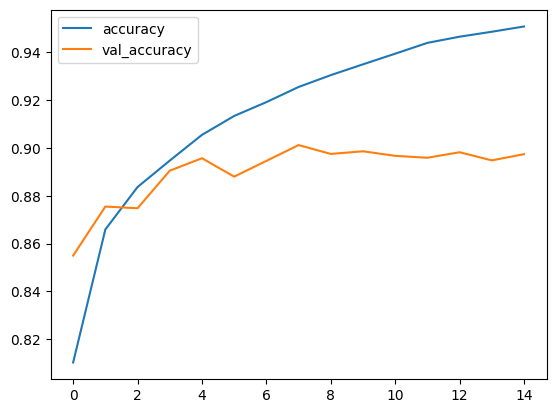

In [9]:
# Plot accuracy 
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()